<a href="https://colab.research.google.com/github/shubhanagrawal/Walmart-Hackathon/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download(
    "https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset")

Skipping, found downloaded files in "./retail-sales-dataset" (use force=True to force download)


In [ ]:
df=pd.read_csv('/content/retail-sales-dataset/retail_sales_dataset.csv')

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.shape

(1000, 9)

In [ ]:
parts = df["Date"].str.split("-", n = 3, expand = True)
df["year"]= parts[0].astype('int')
df["month"]= parts[1].astype('int')
df["day"]= parts[2].astype('int')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6


In [ ]:
from datetime import datetime

def weekend_or_weekday(year, month, day):
    d = datetime(year, month, day)
    return 1 if d.weekday() > 4 else 0

df['weekend'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

In [ ]:
from datetime import date
import holidays

india_holidays = holidays.country_holidays('IN')
df['holidays'] = df['Date'].apply(lambda x: 1 if india_holidays.get(x) else 0)

In [ ]:
import numpy as np

df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,weekend,holidays,m1,m2
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,0,0,-0.500000,0.866025
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,0,0,0.866025,0.500000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,0,0,0.500000,0.866025
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,1,0,0.500000,-0.866025
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,1,0,0.500000,-0.866025


In [ ]:
def which_day(year, month, day):
    return datetime(year, month, day).weekday()

df['weekday'] = df.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1)

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,weekend,holidays,m1,m2,weekday
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,0,0,-5.000000e-01,0.866025,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,0,0,8.660254e-01,0.500000,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,0,0,5.000000e-01,0.866025,4
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,1,0,5.000000e-01,-0.866025,6
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,1,0,5.000000e-01,-0.866025,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,5,16,0,0,5.000000e-01,-0.866025,1
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,11,17,0,0,-5.000000e-01,0.866025,4
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,10,29,1,0,-8.660254e-01,0.500000,6
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,12,5,0,0,-2.449294e-16,1.000000,1


In [ ]:
df.drop(['Transaction ID','Customer ID'], axis=1, inplace=True)

In [ ]:
df['Product Category'].nunique()

3

In [ ]:
    from sklearn.preprocessing import LabelEncoder

In [ ]:
    le = LabelEncoder()

In [ ]:
    df['Encoded_Category'] = le.fit_transform(df['Product Category'])

In [ ]:
df['Encoded_Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,weekend,holidays,m1,m2,weekday,Encoded_Category,Encoded_Gender
0,2023-11-24,Male,34,Beauty,3,50,150,2023,11,24,0,0,-5.000000e-01,0.866025,4,0,1
1,2023-02-27,Female,26,Clothing,2,500,1000,2023,2,27,0,0,8.660254e-01,0.500000,0,1,0
2,2023-01-13,Male,50,Electronics,1,30,30,2023,1,13,0,0,5.000000e-01,0.866025,4,2,1
3,2023-05-21,Male,37,Clothing,1,500,500,2023,5,21,1,0,5.000000e-01,-0.866025,6,1,1
4,2023-05-06,Male,30,Beauty,2,50,100,2023,5,6,1,0,5.000000e-01,-0.866025,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-16,Male,62,Clothing,1,50,50,2023,5,16,0,0,5.000000e-01,-0.866025,1,1,1
996,2023-11-17,Male,52,Beauty,3,30,90,2023,11,17,0,0,-5.000000e-01,0.866025,4,0,1
997,2023-10-29,Female,23,Beauty,4,25,100,2023,10,29,1,0,-8.660254e-01,0.500000,6,0,0
998,2023-12-05,Female,36,Electronics,3,50,150,2023,12,5,0,0,-2.449294e-16,1.000000,1,2,0


In [ ]:
df.drop('Product Category', axis=1, inplace=True)


In [ ]:
df

,Date,Gender,Age,Quantity,Price per Unit,Total Amount,year,month,day,weekend,holidays,m1,m2,weekday,Encoded_Category,Encoded_Gender
0,2023-11-24,Male,34,3,50,150,2023,11,24,0,0,-5.000000e-01,0.866025,4,0,1
1,2023-02-27,Female,26,2,500,1000,2023,2,27,0,0,8.660254e-01,0.500000,0,1,0
2,2023-01-13,Male,50,1,30,30,2023,1,13,0,0,5.000000e-01,0.866025,4,2,1
3,2023-05-21,Male,37,1,500,500,2023,5,21,1,0,5.000000e-01,-0.866025,6,1,1
4,2023-05-06,Male,30,2,50,100,2023,5,6,1,0,5.000000e-01,-0.866025,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-16,Male,62,1,50,50,2023,5,16,0,0,5.000000e-01,-0.866025,1,1,1
996,2023-11-17,Male,52,3,30,90,2023,11,17,0,0,-5.000000e-01,0.866025,4,0,1
997,2023-10-29,Female,23,4,25,100,2023,10,29,1,0,-8.660254e-01,0.500000,6,0,0
998,2023-12-05,Female,36,3,50,150,2023,12,5,0,0,-2.449294e-16,1.000000,1,2,0


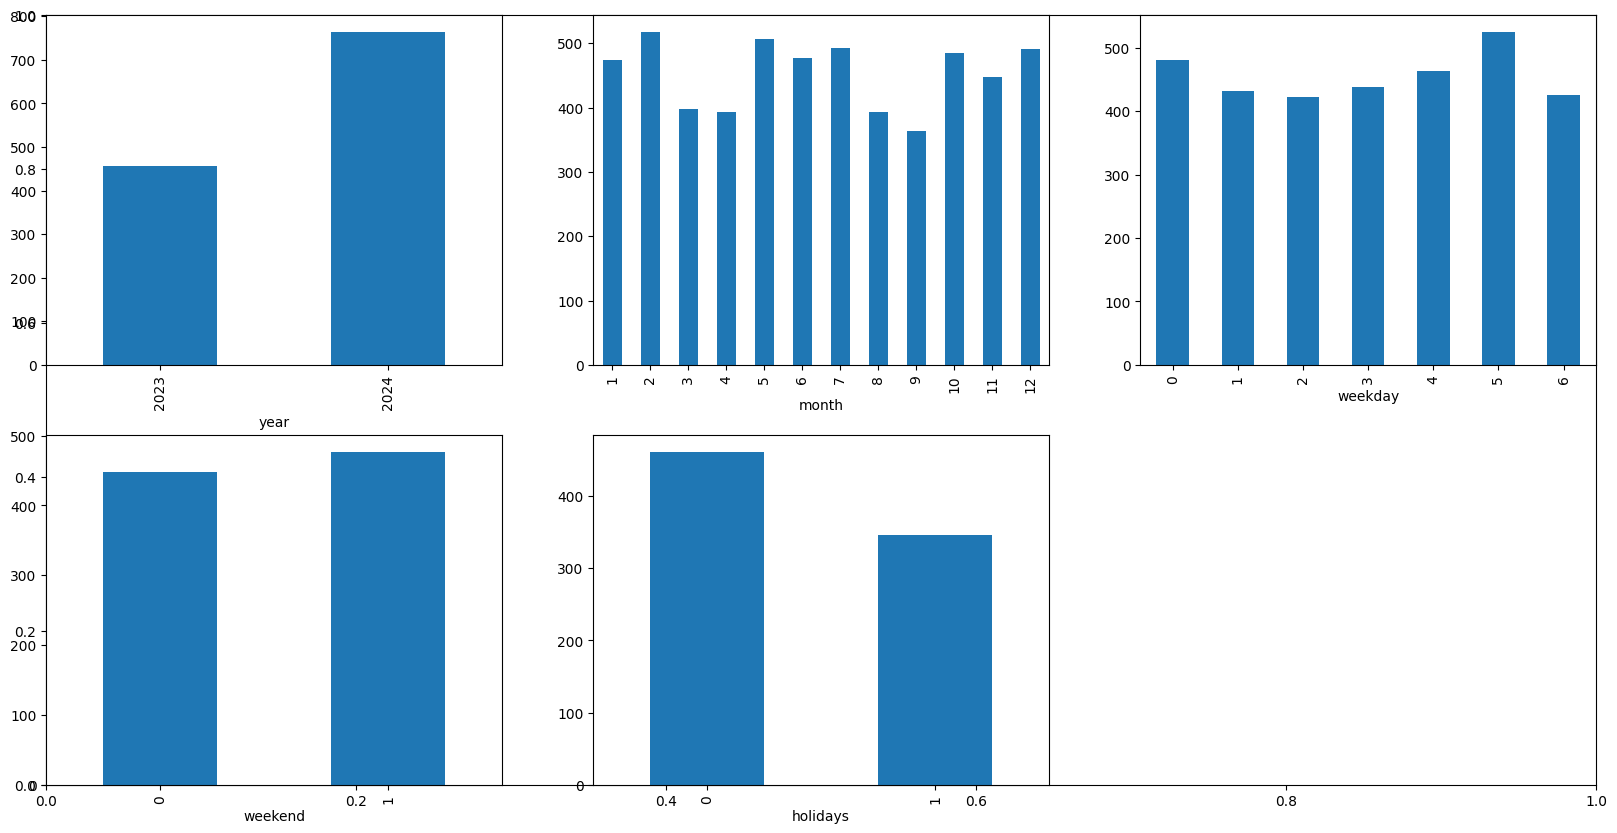

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
features = ['year', 'month', 'weekday', 'weekend', 'holidays']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    # Exclude 'Date' and 'Gender' columns before grouping and calculating the mean
    df.drop(['Date', 'Gender'], axis=1).groupby(col).mean()['Total Amount'].plot.bar()
plt.show()

<Figure size 1000x500 with 0 Axes>

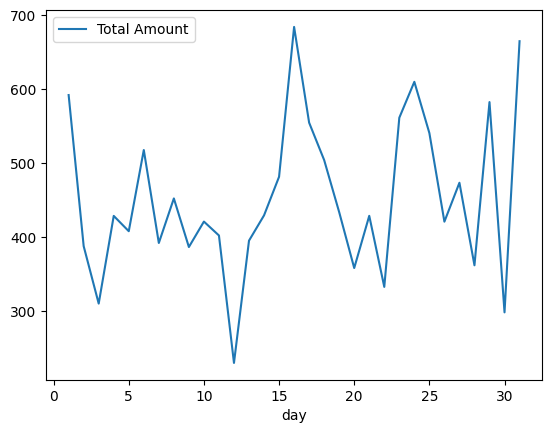

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('day')[['Total Amount']].mean().plot()
plt.show()

/tmp/ipython-input-28-3542643880.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Amount'])


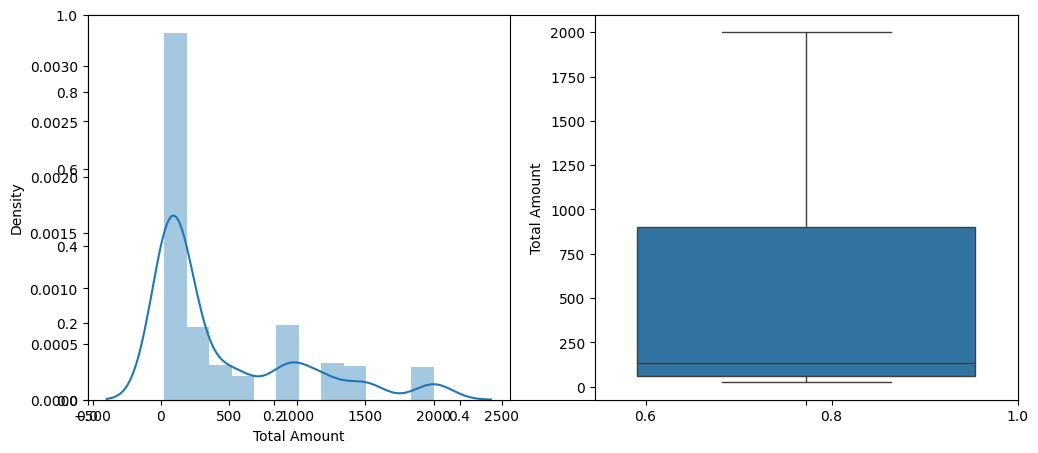

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Total Amount'])
print("\n")
plt.subplot(1, 2, 2)
sns.boxplot(df['Total Amount'])
plt.show()

In [ ]:
df.drop('Date', axis=1, inplace=True)

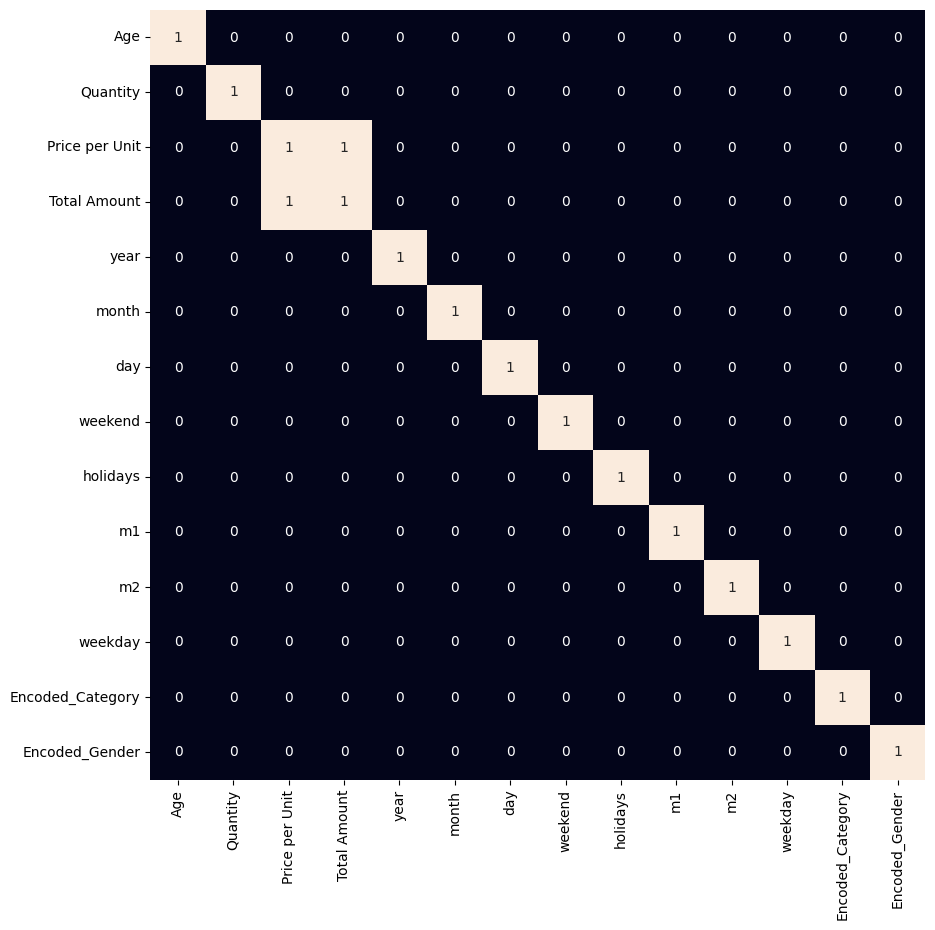

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(['Gender'], axis=1)

plt.figure(figsize=(10, 10))
sns.heatmap(df_numeric.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Added StandardScaler import here for completeness

features = df.drop(['Total Amount', 'year', 'Gender'], axis=1) # Dropped 'Gender' column
target = df['Total Amount'].values


X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.05,
                                                  random_state=22)
X_train.shape, X_val.shape

((950, 12), (50, 12))

In [ ]:
# Normalizing the features for stable and fast training.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor # Assuming xgboost is installed. If not, you'll need to install it.
from sklearn.metrics import mean_absolute_error as mae # Assuming mae is intended

models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for i in range(4):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  175.28126480719538
Validation Error :  175.22599456846837

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  6.890949589433149e-05
Validation Error :  6.797790410928428e-05

Lasso() : 
Training Error :  175.4140641764677
Validation Error :  1

# Task
Predict the quantity required based on the columns present in the dataset.

## Define features and target

### Subtask:
Select the features and set 'Quantity' as the target variable.


**Reasoning**:
Create features and target variables for predicting quantity.



In [ ]:
features_quantity = df.drop(['Quantity', 'Gender'], axis=1)
target_quantity = df['Quantity']

## Split data

### Subtask:
Split the data into training and validation sets.


**Reasoning**:
Split the features and target data for quantity prediction into training and validation sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train_quantity, X_val_quantity, Y_train_quantity, Y_val_quantity = train_test_split(features_quantity, target_quantity,
                                                  test_size = 0.2,
                                                  random_state=42)

## Scale features

### Subtask:
Scale the features using StandardScaler.


**Reasoning**:
Scale the training and validation features using StandardScaler.



In [ ]:
scaler = StandardScaler()
X_train_quantity = scaler.fit_transform(X_train_quantity)
X_val_quantity = scaler.transform(X_val_quantity)

**Reasoning**:
The error indicates that the 'Gender' column is still present in the features DataFrame and is not in a numerical format suitable for StandardScaler. I need to remove the 'Gender' column before scaling the features.



In [ ]:
scaler = StandardScaler()
X_train_quantity = scaler.fit_transform(X_train_quantity)
X_val_quantity = scaler.transform(X_val_quantity)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae

models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for i in range(4):
    models[i].fit(X_train_quantity, Y_train_quantity)

    print(f'{models[i]} : ')

    train_preds_quantity = models[i].predict(X_train_quantity)
    print('Training Error : ', mae(Y_train_quantity, train_preds_quantity))

    val_preds_quantity = models[i].predict(X_val_quantity)
    print('Validation Error : ', mae(Y_val_quantity, val_preds_quantity))
    print()

LinearRegression() : 
Training Error :  0.6579813480703581
Validation Error :  0.6707285857571995

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  9.498074359726161e-05
Validation Error :  9.994864376494661e-05

Lasso() : 
Training Error :  1.012525
Validation Error :  1.02980000

# Task
Predict the quantity for a certain month using the trained XGBoost model and evaluate its accuracy.

## Select a month

### Subtask:
Choose a specific month for which you want to predict quantity.


**Reasoning**:
Choose a specific month for prediction and store it in a variable.



In [ ]:
prediction_month = 7

## Select a month

### Subtask:
Choose a specific month for which you want to predict quantity.

**Reasoning**:
Choose a specific month for prediction and store it in a variable.

In [ ]:
prediction_month = 7

## Filter data

### Subtask:
Filter the original dataset to include only the data for the selected month.

**Reasoning**:
Filter the DataFrame to keep only the rows where the 'month' column matches the `prediction_month`.

In [ ]:
df_prediction_month = df[df['month'] == prediction_month].copy()
display(df_prediction_month.head())

,Gender,Age,Quantity,Price per Unit,Total Amount,year,month,day,weekend,holidays,m1,m2,weekday,Encoded_Category,Encoded_Gender
42,Female,48,1,300,300,2023,7,14,0,0,-0.5,-0.866025,4,1,0
44,Female,55,1,30,30,2023,7,3,0,0,-0.5,-0.866025,0,2,0
52,Male,34,2,50,100,2023,7,13,0,0,-0.5,-0.866025,3,2,1
58,Male,62,1,50,50,2023,7,5,0,0,-0.5,-0.866025,2,1,1
70,Female,51,4,25,100,2023,7,14,0,0,-0.5,-0.866025,4,0,0


## Prepare data for prediction

### Subtask:
Select the same features used for training and scale them using the same scaler.

**Reasoning**:
Select the features for the prediction month data and scale them using the previously fitted `scaler`.

In [ ]:
# Select the same features as used for training quantity prediction
features_prediction_month = df_prediction_month.drop(['Quantity', 'Gender'], axis=1)

# Convert the features DataFrame to a NumPy array before scaling
X_prediction_month = scaler.transform(features_prediction_month.values)

display(X_prediction_month[:5])

array([[ 4.80000000e+01,  3.00000000e+02,  3.00000000e+02,
         2.02300000e+03,  7.00000000e+00,  1.40000000e+01,
         3.44169138e-17,  4.44089210e-18, -5.00000000e-01,
        -8.66025404e-01,  4.00000000e+00,  1.00000000e+00,
         4.99600361e-17],
       [ 5.50000000e+01,  3.00000000e+01,  3.00000000e+01,
         2.02300000e+03,  7.00000000e+00,  3.00000000e+00,
         3.44169138e-17,  4.44089210e-18, -5.00000000e-01,
        -8.66025404e-01,  4.44089210e-18,  2.00000000e+00,
         4.99600361e-17],
       [ 3.40000000e+01,  5.00000000e+01,  1.00000000e+02,
         2.02300000e+03,  7.00000000e+00,  1.30000000e+01,
         3.44169138e-17,  4.44089210e-18, -5.00000000e-01,
        -8.66025404e-01,  3.00000000e+00,  2.00000000e+00,
         1.00000000e+00],
       [ 6.20000000e+01,  5.00000000e+01,  5.00000000e+01,
         2.02300000e+03,  7.00000000e+00,  5.00000000e+00,
         3.44169138e-17,  4.44089210e-18, -5.00000000e-01,
        -8.66025404e-01,  2.00000000e

## Predict quantity

### Subtask:
Use the trained XGBoost model to predict the quantity for the filtered data.

**Reasoning**:
Use the `predict` method of the trained XGBoost model to get the quantity predictions for the prediction month data.

In [ ]:
# Assuming the trained XGBoost model is stored in the 'models' list at index 1 (based on previous training loop)
xgb_model_quantity = models[1]

# Predict the quantity for the prediction month data
predictions_quantity = xgb_model_quantity.predict(X_prediction_month)

# Display the first few predictions
display(predictions_quantity[:5])

array([3.9998558, 3.9998558, 3.9998558, 3.9998558, 3.9998558],
      dtype=float32)

## Evaluate accuracy

### Subtask:
Compare the predicted quantities with the actual quantities for the selected month and calculate an accuracy metric.

**Reasoning**:
Extract the actual quantities for the prediction month and calculate the Mean Absolute Error between the predicted and actual quantities.

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

# Get the actual quantities for the prediction month
actual_quantities = df_prediction_month['Quantity'].values

# Calculate the Mean Absolute Error
mae_prediction_month = mae(actual_quantities, predictions_quantity)

print(f"Mean Absolute Error for month {prediction_month}: {mae_prediction_month}")

Mean Absolute Error for month 7: 1.555471420288086


In [ ]:
import pandas as pd

# Create a DataFrame to display actual vs predicted quantities
comparison_df = pd.DataFrame({'Actual Quantity': actual_quantities, 'Predicted Quantity': predictions_quantity})

# Display the comparison DataFrame
display(comparison_df.head())

# You can also display more rows or the entire DataFrame if needed
# display(comparison_df)

,Actual Quantity,Predicted Quantity
0,1,3.999856
1,1,3.999856
2,2,3.999856
3,1,3.999856
4,4,3.999856


# Task
Analyze customer data to develop shopping personas and product preferences, outline a product personalization strategy, and refine the demand prediction and dynamic pricing approaches based on the provided objectives.

## Customer data analysis

### Subtask:
Explore the available customer data (e.g., Customer ID, Gender, Age, purchase history) to understand customer demographics and behavior.


**Reasoning**:
Display the first few rows of the dataframe to understand the data structure and columns, check data types and non-null counts using .info(), and get statistical summary of numerical columns using .describe().



In [ ]:
display(df.head())
df.info()
display(df.describe())

,Gender,Age,Quantity,Price per Unit,Total Amount,year,month,day,weekend,holidays,m1,m2,weekday,Encoded_Category,Encoded_Gender
0,Male,34,3,50,150,2023,11,24,0,0,-0.500000,0.866025,4,0,1
1,Female,26,2,500,1000,2023,2,27,0,0,0.866025,0.500000,0,1,0
2,Male,50,1,30,30,2023,1,13,0,0,0.500000,0.866025,4,2,1
3,Male,37,1,500,500,2023,5,21,1,0,0.500000,-0.866025,6,1,1
4,Male,30,2,50,100,2023,5,6,1,0,0.500000,-0.866025,5,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1000 non-null   object 
 1   Age               1000 non-null   int64  
 2   Quantity          1000 non-null   int64  
 3   Price per Unit    1000 non-null   int64  
 4   Total Amount      1000 non-null   int64  
 5   year              1000 non-null   int64  
 6   month             1000 non-null   int64  
 7   day               1000 non-null   int64  
 8   weekend           1000 non-null   int64  
 9   holidays          1000 non-null   int64  
 10  m1                1000 non-null   float64
 11  m2                1000 non-null   float64
 12  weekday           1000 non-null   int64  
 13  Encoded_Category  1000 non-null   int64  
 14  Encoded_Gender    1000 non-null   int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 117.3+ KB


,Age,Quantity,Price per Unit,Total Amount,year,month,day,weekend,holidays,m1,m2,weekday,Encoded_Category,Encoded_Gender
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.00000,1000.000000,1000.00000
mean,41.39200,2.514000,179.890000,456.000000,2023.002000,6.549000,15.310000,0.288000,0.048000,8.045517e-03,-3.686533e-03,2.95800,1.035000,0.49000
std,13.68143,1.132734,189.681356,559.997632,0.044699,3.452755,8.871674,0.453058,0.213873,7.017319e-01,7.130883e-01,2.02097,0.805247,0.50015
min,18.00000,1.000000,25.000000,25.000000,2023.000000,1.000000,1.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.00000,0.000000,0.00000
25%,29.00000,1.000000,30.000000,60.000000,2023.000000,4.000000,7.000000,0.000000,0.000000,-8.660254e-01,-8.660254e-01,1.00000,0.000000,0.00000
50%,42.00000,3.000000,50.000000,135.000000,2023.000000,6.000000,15.000000,0.000000,0.000000,1.224647e-16,6.123234e-17,3.00000,1.000000,0.00000
75%,53.00000,4.000000,300.000000,900.000000,2023.000000,10.000000,23.000000,1.000000,0.000000,5.000000e-01,5.000000e-01,5.00000,2.000000,1.00000
max,64.00000,4.000000,500.000000,2000.000000,2024.000000,12.000000,31.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,6.00000,2.000000,1.00000


**Reasoning**:
Check the unique values and their counts for the categorical columns 'Gender' and 'Product Category' to understand their distribution.



In [ ]:
display(df['Gender'].value_counts())
display(df['Encoded_Category'].value_counts())

,count
Gender,
Female,510
Male,490


,count
Encoded_Category,
1,351
2,342
0,307


**Reasoning**:
The 'Product Category' column was dropped in a previous step. I will display the unique values and counts for the 'Encoded_Category' column instead.



In [ ]:
display(df['Encoded_Category'].value_counts())

,count
Encoded_Category,
1,351
2,342
0,307


## Develop shopping personas (objective 1)

### Subtask:
Based on the customer data analysis, identify different customer segments or personas and their characteristics.


**Reasoning**:
Group the DataFrame by encoded category and gender, calculate the mean of numerical columns, and rename the columns for clarity to identify customer segments.



In [ ]:
customer_segments = df.drop('Gender', axis=1).groupby(['Encoded_Category', 'Encoded_Gender']).mean()
customer_segments.columns = [f"{col}_mean" for col in customer_segments.columns]
display(customer_segments)

Age_mean  Quantity_mean  \
Encoded_Category Encoded_Gender                             
0                0               40.355422       2.518072   
                 1               40.390071       2.503546   
1                0               43.166667       2.534483   
                 1               40.751412       2.559322   
2                0               40.482353       2.582353   
                 1               42.976744       2.383721   

                                 Price per Unit_mean  Total Amount_mean  \
Encoded_Category Encoded_Gender                                           
0                0                        182.349398         450.783133   
                 1                        186.063830         487.127660   
1                0                        179.224138         467.097701   
                 1                        169.435028         419.802260   
2                0                        178.705882         451.382353   
                 1                        185.058140         466.104651   

                                   year_mean  month_mean   day_mean  \
Encoded_Category Encoded_Gender                                       
0                0               2023.000000    6.373494  16.259036   
                 1               2023.007092    6.631206  15.304965   
1                0               2023.000000    6.408046  15.810345   
                 1               2023.000000    5.960452  14.762712   
2                0               2023.000000    7.141176  15.617647   
                 1               2023.005814    6.813953  14.151163   

                                 weekend_mean  holidays_mean   m1_mean  \
Encoded_Category Encoded_Gender                                          
0                0                   0.277108       0.048193  0.071266   
                 1                   0.241135       0.035461 -0.069717   
1                0                   0.287356       0.045977  0.066449   
                 1                   0.288136       0.056497  0.121469   
2                0                   0.347059       0.035294 -0.111497   
                 1                   0.279070       0.063953 -0.046873   

                                  m2_mean  weekday_mean  
Encoded_Category Encoded_Gender                          
0                0               0.020277      2.807229  
                 1              -0.034256      2.822695  
1                0              -0.048081      3.000000  
                 1               0.002271      3.062147  
2                0               0.046482      3.111765  
                 1              -0.012560      2.912791

**Reasoning**:
The error indicates that there is a non-numeric column in the DataFrame when calculating the mean. I need to drop the 'Gender' column before grouping as it is still present and causing the error.



In [ ]:
customer_segments = df.drop('Gender', axis=1).groupby(['Encoded_Category', 'Encoded_Gender']).mean()
customer_segments.columns = [f"{col}_mean" for col in customer_segments.columns]
display(customer_segments)

Age_mean  Quantity_mean  \
Encoded_Category Encoded_Gender                             
0                0               40.355422       2.518072   
                 1               40.390071       2.503546   
1                0               43.166667       2.534483   
                 1               40.751412       2.559322   
2                0               40.482353       2.582353   
                 1               42.976744       2.383721   

                                 Price per Unit_mean  Total Amount_mean  \
Encoded_Category Encoded_Gender                                           
0                0                        182.349398         450.783133   
                 1                        186.063830         487.127660   
1                0                        179.224138         467.097701   
                 1                        169.435028         419.802260   
2                0                        178.705882         451.382353   
                 1                        185.058140         466.104651   

                                   year_mean  month_mean   day_mean  \
Encoded_Category Encoded_Gender                                       
0                0               2023.000000    6.373494  16.259036   
                 1               2023.007092    6.631206  15.304965   
1                0               2023.000000    6.408046  15.810345   
                 1               2023.000000    5.960452  14.762712   
2                0               2023.000000    7.141176  15.617647   
                 1               2023.005814    6.813953  14.151163   

                                 weekend_mean  holidays_mean   m1_mean  \
Encoded_Category Encoded_Gender                                          
0                0                   0.277108       0.048193  0.071266   
                 1                   0.241135       0.035461 -0.069717   
1                0                   0.287356       0.045977  0.066449   
                 1                   0.288136       0.056497  0.121469   
2                0                   0.347059       0.035294 -0.111497   
                 1                   0.279070       0.063953 -0.046873   

                                  m2_mean  weekday_mean  
Encoded_Category Encoded_Gender                          
0                0               0.020277      2.807229  
                 1              -0.034256      2.822695  
1                0              -0.048081      3.000000  
                 1               0.002271      3.062147  
2                0               0.046482      3.111765  
                 1              -0.012560      2.912791

## Analyze product preferences (objective 1)

### Subtask:
Examine customer purchase history and product categories to understand product affinities and build preference insights.


**Reasoning**:
Group the DataFrame by 'Encoded_Category' and calculate the mean of the specified columns to understand product affinities and preferences.



In [ ]:
product_affinity = df.groupby('Encoded_Category')[['Quantity', 'Price per Unit', 'Total Amount']].mean()
display(product_affinity)

,Quantity,Price per Unit,Total Amount
Encoded_Category,,,
0,2.511401,184.055375,467.475570
1,2.547009,174.287749,443.247863
2,2.482456,181.900585,458.786550


In [ ]:
product_affinity = df.groupby('Encoded_Category')[['Quantity', 'Price per Unit', 'Total Amount']].mean()
display(product_affinity)

,Quantity,Price per Unit,Total Amount
Encoded_Category,,,
0,2.511401,184.055375,467.475570
1,2.547009,174.287749,443.247863
2,2.482456,181.900585,458.786550


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Create the XGBRegressor model
xgb = XGBRegressor(random_state=42)

# Define the evaluation metric (MAE)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False) # Use negative MAE for GridSearchCV

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring=mae_scorer, cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_quantity, Y_train_quantity)

# Print the best hyperparameters found
print("Best hyperparameters found: ", grid_search.best_params_)

# Evaluate the best model on the validation data
best_xgb_model = grid_search.best_estimator_
val_preds_tuned = best_xgb_model.predict(X_val_quantity)
mae_tuned = mean_absolute_error(Y_val_quantity, val_preds_tuned)
print(f'Validation Error (MAE) after tuning: {mae_tuned}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Validation Error (MAE) after tuning: 9.911775850923732e-05


In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [5]:
!unzip -q archive.zip -d retail_data

In [7]:
!ls retail_data

retail_store_inventory.csv


In [9]:
import pandas as pd

df_kaggle = pd.read_csv('retail_data/retail_store_inventory.csv')
df_kaggle['Date'] = pd.to_datetime(df_kaggle['Date'])

print(df_kaggle.head())
print(df_kaggle.info())

        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunn

In [10]:
df_kaggle.rename(columns={
    'date': 'Date',
    'store': 'Store',
    'item': 'Dept',
    'sales': 'Weekly_Sales'
}, inplace=True)

df_kaggle.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [12]:
df_kaggle = df_kaggle.sort_values(['Store ID', 'Product ID', 'Date'])

df_kaggle['lag_7'] = df_kaggle.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(7)
df_kaggle['rolling_mean_7'] = (
    df_kaggle.groupby(['Store ID', 'Product ID'])['Units Sold']
    .transform(lambda x: x.shift(1).rolling(7).mean())
)

df_kaggle.fillna(0, inplace=True)

In [13]:
!pip install xgboost

In [15]:
from xgboost import XGBRegressor

FEATURES = ['lag_7', 'rolling_mean_7']
TARGET = 'Units Sold'

X_train = df_kaggle[FEATURES]
y_train = df_kaggle[TARGET]

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

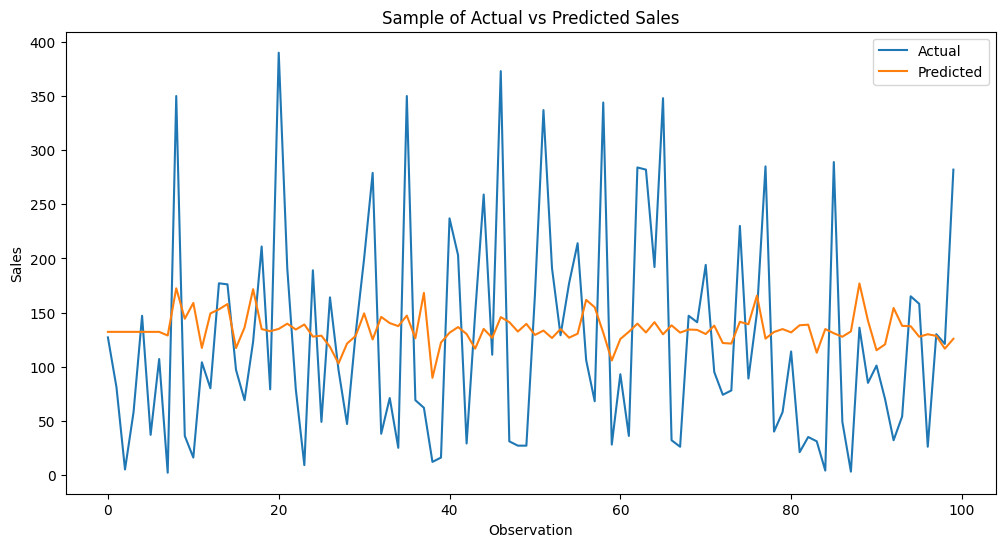

In [16]:
y_pred = model.predict(X_train)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_train.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Sample of Actual vs Predicted Sales")
plt.xlabel("Observation")
plt.ylabel("Sales")
plt.show()